# Workbook that illustrates differences in performance between smaller and larger models 

In this worksbook we use the Ollama server to run the models on a larger machine. We use the larger machine because we want to run the large models on exactly the same hadware as the smaller ones; othewrwise the results would not be comparable.

Models tested:
- "smollm:135m", "smollm:360m", "smollm:1.7b"
- https://ollama.com/library/qwen3

In [1]:
# configuration of our test - a number of prompts and a number of models
prompts = ["Generate a Fibonacci function in C", 
           "Write a script to sort a list of numbers",
           "Explain the concept of recursion in programming",
           "What is the difference between a stack and a queue?",
           "How do you implement a binary search algorithm?", 
           "Describe the Model-View-Controller (MVC) architecture",
           "What is the purpose of a constructor in object-oriented programming?",
           "Explain the concept of polymorphism in programming",
           "What is the difference between synchronous and asynchronous programming?",
           "How do you handle exceptions in Python?",
           "What is the purpose of a database index?",
           "Explain the concept of multithreading in programming",
           "What is the difference between a for loop and a while loop?",
           "Implement bubble sort in C",
           "Implement quick sort in C",
           "Implement insertion sort in C",
           "Write a function to calculate factorial in C",
           "Explain the difference between pass-by-value and pass-by-reference",
           "Describe the Singleton design pattern",
           "What is the difference between TCP and UDP?",
           "How do you implement a linked list in C?",
           "Explain the concept of dynamic programming",
           "What is the difference between a class and an object?",
           "Write a function to reverse a string in C",
           "Describe the Observer design pattern",
           "Explain the concept of memoization in programming",
           "What is the difference between breadth-first search and depth-first search?",
           "Write a program to check if a number is prime in C",
           "Describe the Factory design pattern",
           "What is the difference between HTTP and HTTPS?",
           "Explain the concept of garbage collection in programming",
           "Write a program to find the greatest common divisor (GCD) in C",
           "Describe the Adapter design pattern",
           "What is the difference between public, private, and protected access modifiers?",
           "Explain the concept of hashing in programming"]

models = ["smollm:135m", "smollm:360m", "smollm:1.7b"]

# other candidate models: 


In [2]:
import requests
import json
from tqdm import tqdm

url = 'http://deepthought.cse.chalmers.se:80/api/chat'

results = {}

for strPrompt in tqdm(prompts):
    results[strPrompt] = []

    messages = [
            {"role": "system",
             "content": "You are a software that writes C programs based on prompts. Provides only the code, no description."},
            {"role": "user", 
             "content": strPrompt}
            ]

    for model in models:
        data = {
            "model": model,
            "messages": messages,
            "stream": False, 
            "temperature": 0.0,
            "options": {
                "max_tokens": 1000,
                "seed": 42
            }
        }
        headers = {'Content-Type': 'application/json'}

        response = requests.post(url, data=json.dumps(data), headers=headers)
        result = json.loads(response.text)["message"]["content"]
        results[strPrompt].append(result)
        #print("\n" + "="*50 + "\n")

100%|██████████| 35/35 [03:58<00:00,  6.82s/it]


In [3]:
# Print the results
for prompt, outputs in results.items():
    print(f"{'<'*10} Prompt: {prompt} {'>'*10}")
    for model, output in zip(models, outputs):
        print(f"Model: {model} >> Output:\n{output}\n")
    print("="*50)

<<<<<<<<<< Prompt: Generate a Fibonacci function in C >>>>>>>>>>
Model: smollm:135m >> Output:
Here is a Python implementation of a Fibonacci function in C:

```python
def fibonacci(n):
    if n < 0:
        raise ValueError("Input must be non-negative integer")

    a, b = 1, 1
    for i in range(2, n + 1):
        c = a + b
        a = b
        b = c
        yield c
```

Model: smollm:360m >> Output:
Here is an example of how you can implement a Fibonacci function in C:
```
#include <stdio.h>
#include <string.h>

int fibonacci(int n) {
    if (n == 0 || n == 1) return 0;
    return fibonacci(n - 1) + fibonacci(n - 2);
}

int main() {
    int num = 5; // input number
    char prompt[num]; // prompt string

    printf("Fibonacci sequence: %s\n", prompt);

    while (fibonacci(num)) {
        printf("%d ", fibonacci(num));
        num--;
    }

    return 0;
}
```
This implementation uses a loop to generate the Fibonacci sequence. The `fibonacci` function takes an integer argument `n` 

In [11]:
# convert the results to a dataframe and save it to excel
import pandas as pd
df = pd.DataFrame.from_dict(results, orient='index', columns=models)
df.to_excel("results_smollm.xlsx", index_label="Prompt")

In [4]:
# for each prompt, compare the outputs of the models using BLEU score
from nltk.translate.bleu_score import sentence_bleu

# dictionary to save results
bleu_scores = {}

for prompt, outputs in tqdm(results.items()):
    #print(f"{'<'*10} BLEU Scores for Prompt: {prompt} {'>'*10}")
    reference = outputs[0]  # Use the first model's output as the reference
    bleu_scores[prompt] = []
    for i, output in enumerate(outputs):
        candidate = output
        bleu_score = sentence_bleu([reference], candidate)
        #print(f"Model {models[i]} BLEU Score: {bleu_score:.4f}")
        bleu_scores[prompt].append(bleu_score)
    #print("="*50)

100%|██████████| 35/35 [00:00<00:00, 75.56it/s]


In [6]:
from rouge_score import rouge_scorer

# dictionary to save results
rouge_l_scores = {}

scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

for prompt, outputs in tqdm(results.items()):
    reference = outputs[0]  # Use the first model's output as the reference
    rouge_l_scores[prompt] = []
    for output in outputs:
        score = scorer.score(reference, output)
        rouge_l = score['rougeL'].fmeasure
        rouge_l_scores[prompt].append(rouge_l)

100%|██████████| 35/35 [00:03<00:00,  9.10it/s]


In [7]:
# convert the bleu_scores dictionary to a pandas DataFrame for better visualization
import pandas as pd

bleu_df = pd.DataFrame(bleu_scores).T

bleu_df.columns = models
bleu_df.index.name = 'Prompt'

bleu_df.head()

,smollm:135m,smollm:360m,smollm:1.7b
Prompt,,,
Generate a Fibonacci function in C,1.0,0.108490,0.313324
Write a script to sort a list of numbers,1.0,0.069126,0.261313
Explain the concept of recursion in programming,1.0,0.574750,0.584922
What is the difference between a stack and a queue?,1.0,0.349211,0.303615
How do you implement a binary search algorithm?,1.0,0.611292,0.474554


In [12]:
# calculate average BLEU and ROUGE-L scores for each model
average_bleu_scores = bleu_df.mean().sort_values(ascending=False)
average_rouge_l_scores = rouge_l_df.mean().sort_values(ascending=False)
# print the average scores
print("\nAverage BLEU Scores:")
print(average_bleu_scores)
print("\nAverage ROUGE-L Scores:")
print(average_rouge_l_scores)


Average BLEU Scores:
smollm:135m    1.000000
smollm:360m    0.347998
smollm:1.7b    0.342718
dtype: float64

Average ROUGE-L Scores:
smollm:135m    1.000000
smollm:1.7b    0.210828
smollm:360m    0.190005
dtype: float64


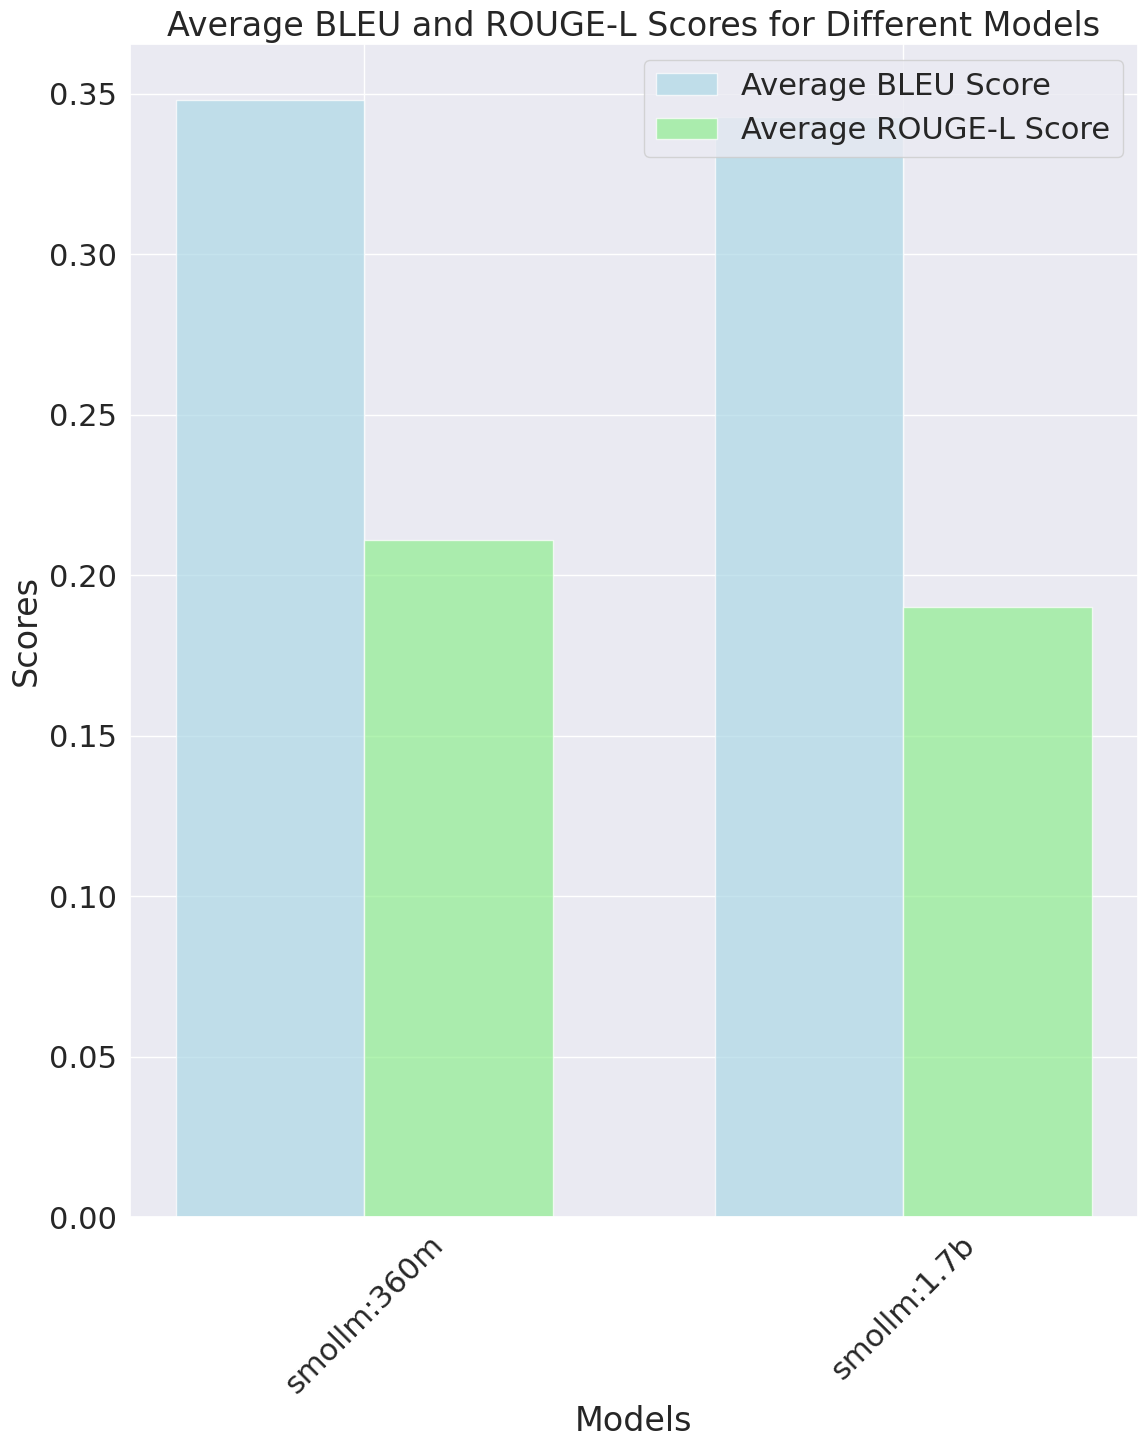

In [13]:
import numpy as np

# Create x-axis positions for the bars
width = 0.35
x = np.arange(len(average_bleu_scores.values[1:]))  # [1:] to match the data slicing

plt.figure(figsize=(12, 15))
plt.bar(x - width/2, average_bleu_scores.values[1:], width, label='Average BLEU Score', color='lightblue', alpha=0.7)
plt.bar(x + width/2, average_rouge_l_scores.values[1:], width, label='Average ROUGE-L Score', color='lightgreen', alpha=0.7)
plt.title('Average BLEU and ROUGE-L Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(x, average_bleu_scores.index[1:], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('qwen_average_scores.png')
plt.show()

In [8]:
# convert the rouge_l_scores dictionary to a pandas DataFrame for better visualization
rouge_l_df = pd.DataFrame(rouge_l_scores).T
rouge_l_df.columns = models
rouge_l_df.index.name = 'Prompt'
rouge_l_df.head()

,smollm:135m,smollm:360m,smollm:1.7b
Prompt,,,
Generate a Fibonacci function in C,1.0,0.148387,0.275862
Write a script to sort a list of numbers,1.0,0.122772,0.292308
Explain the concept of recursion in programming,1.0,0.259851,0.211254
What is the difference between a stack and a queue?,1.0,0.241569,0.216906
How do you implement a binary search algorithm?,1.0,0.247514,0.190132


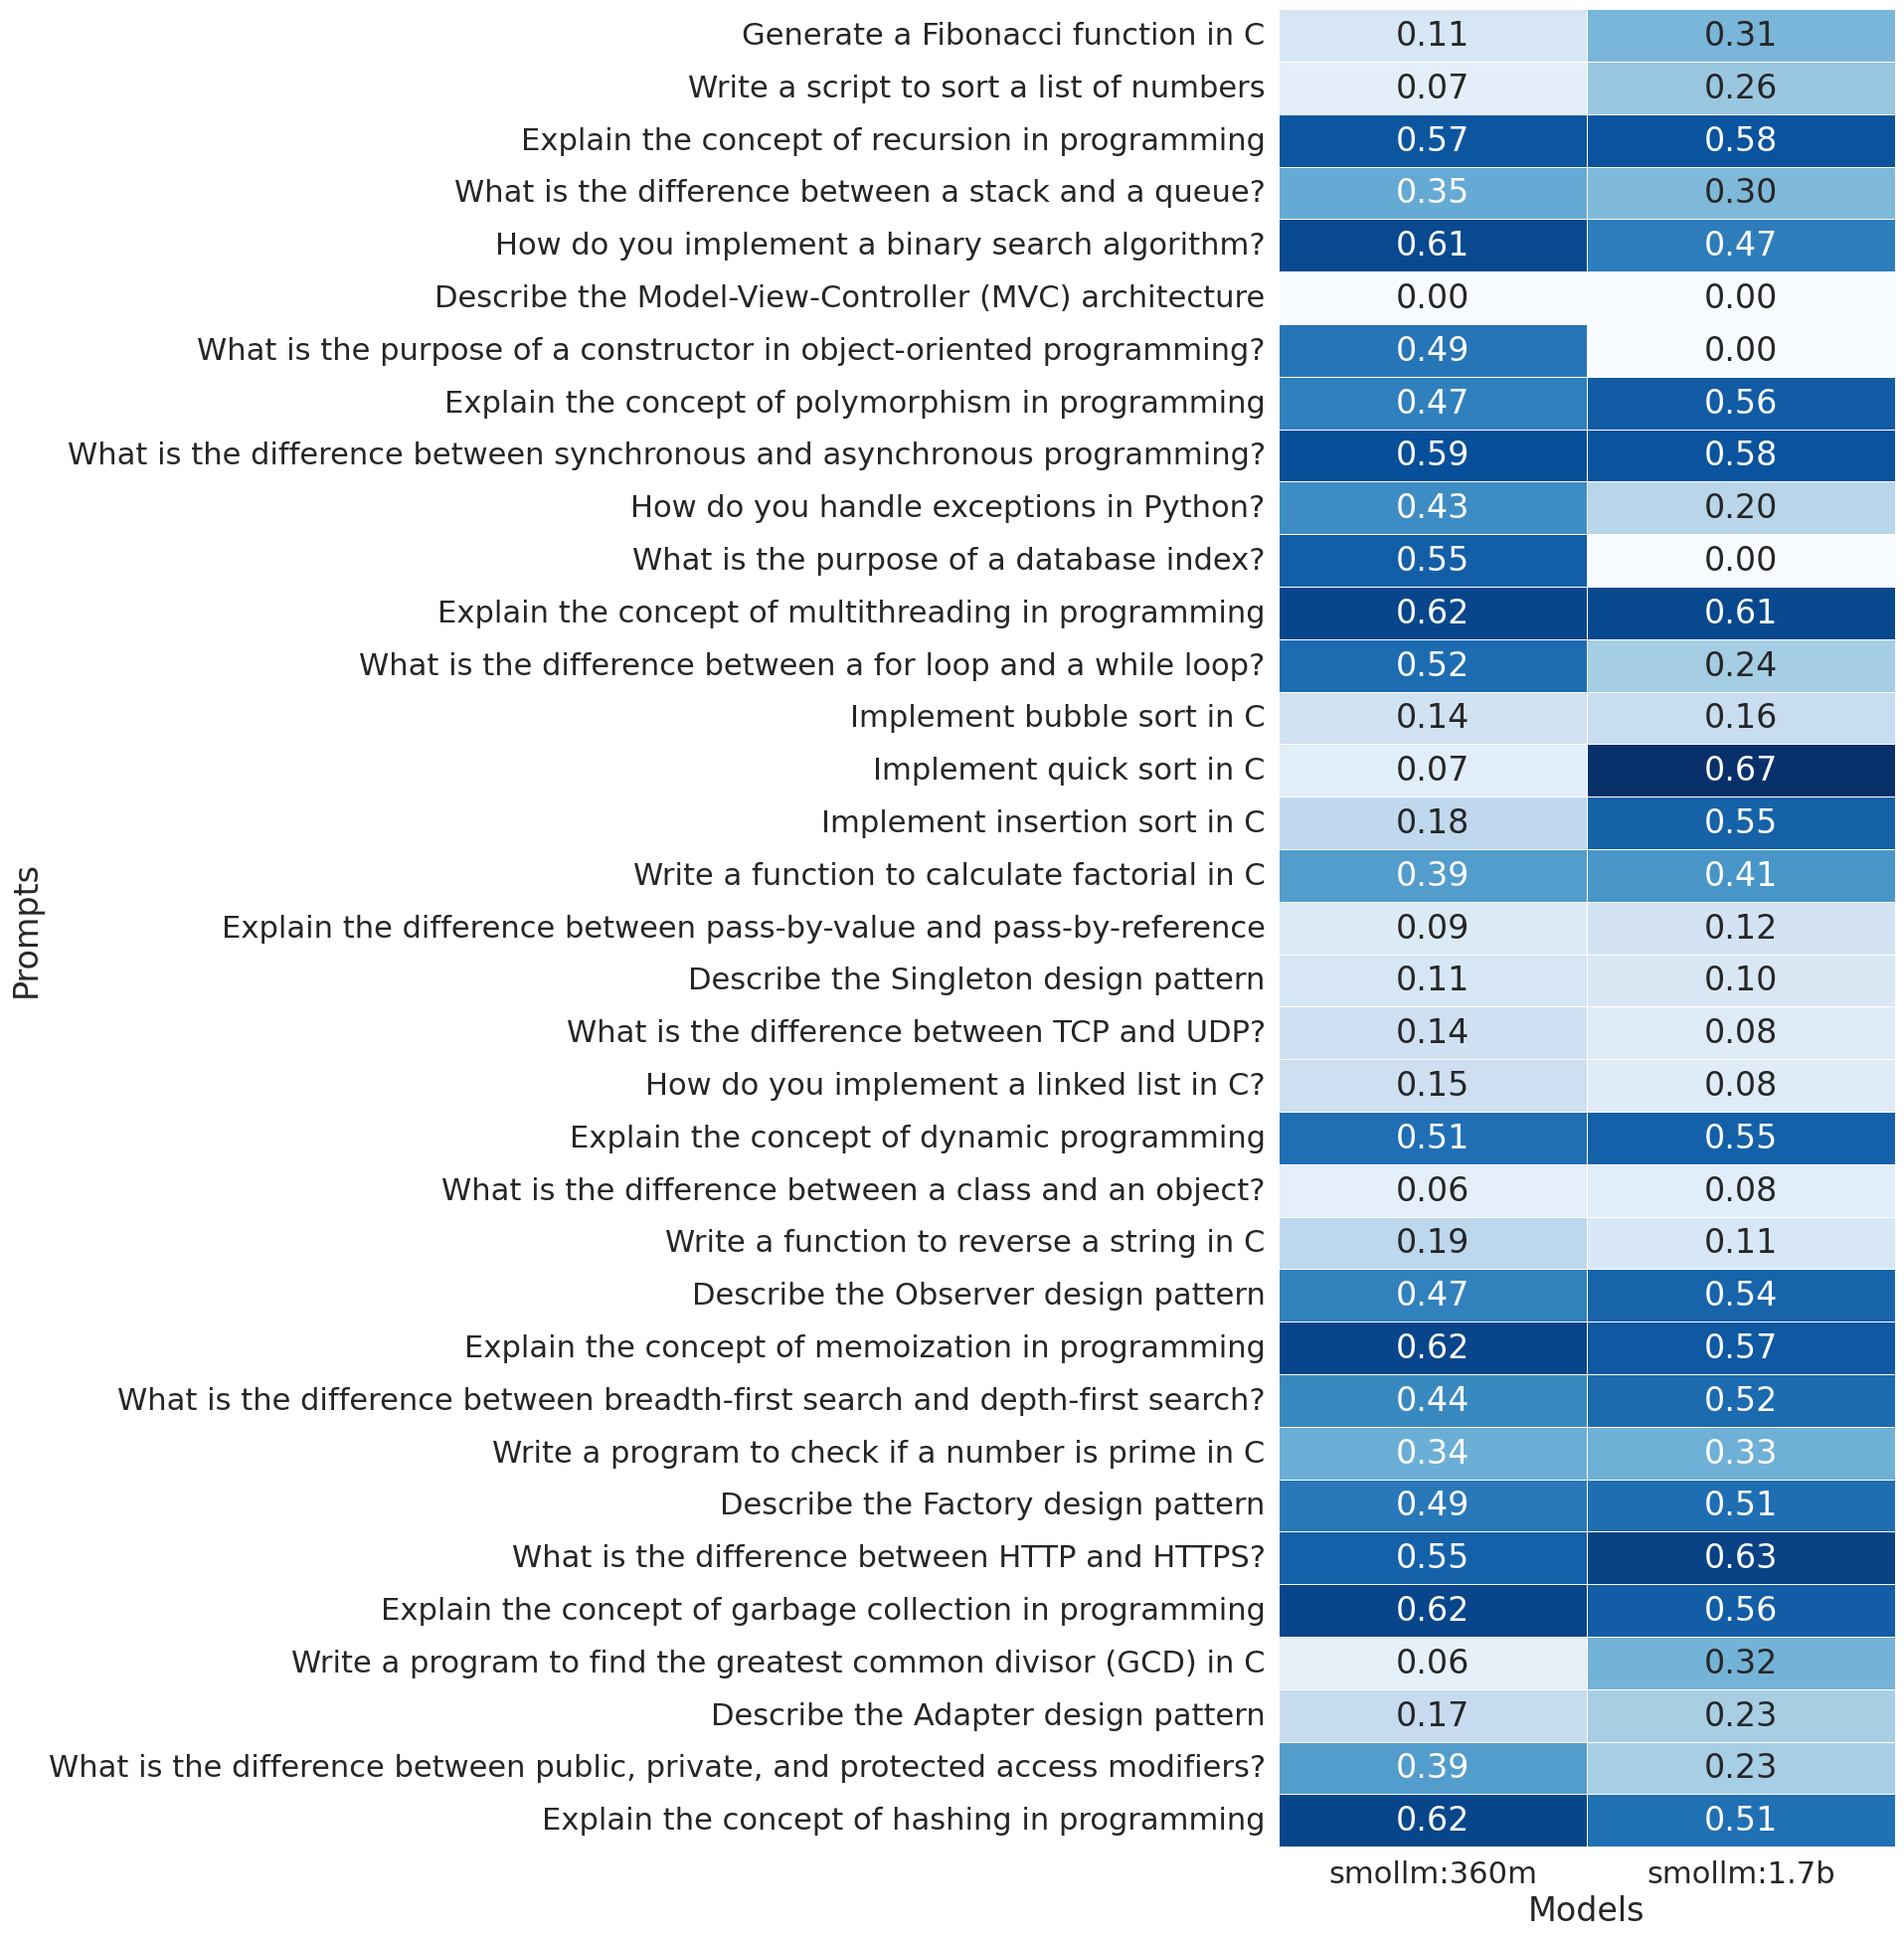

In [9]:
# visualize the BLEU scores using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

scale = 2.0

plt.figure(figsize=(4 * scale, 12 * scale))
sns.set(font_scale=scale)
sns.heatmap(bleu_df.iloc[:,1:], annot=True, cmap='Blues', fmt=".2f", linewidths=.5, cbar=False)
#plt.title('BLEU Scores for Models and Prompts')
plt.xlabel('Models')
plt.ylabel('Prompts')
plt.show()

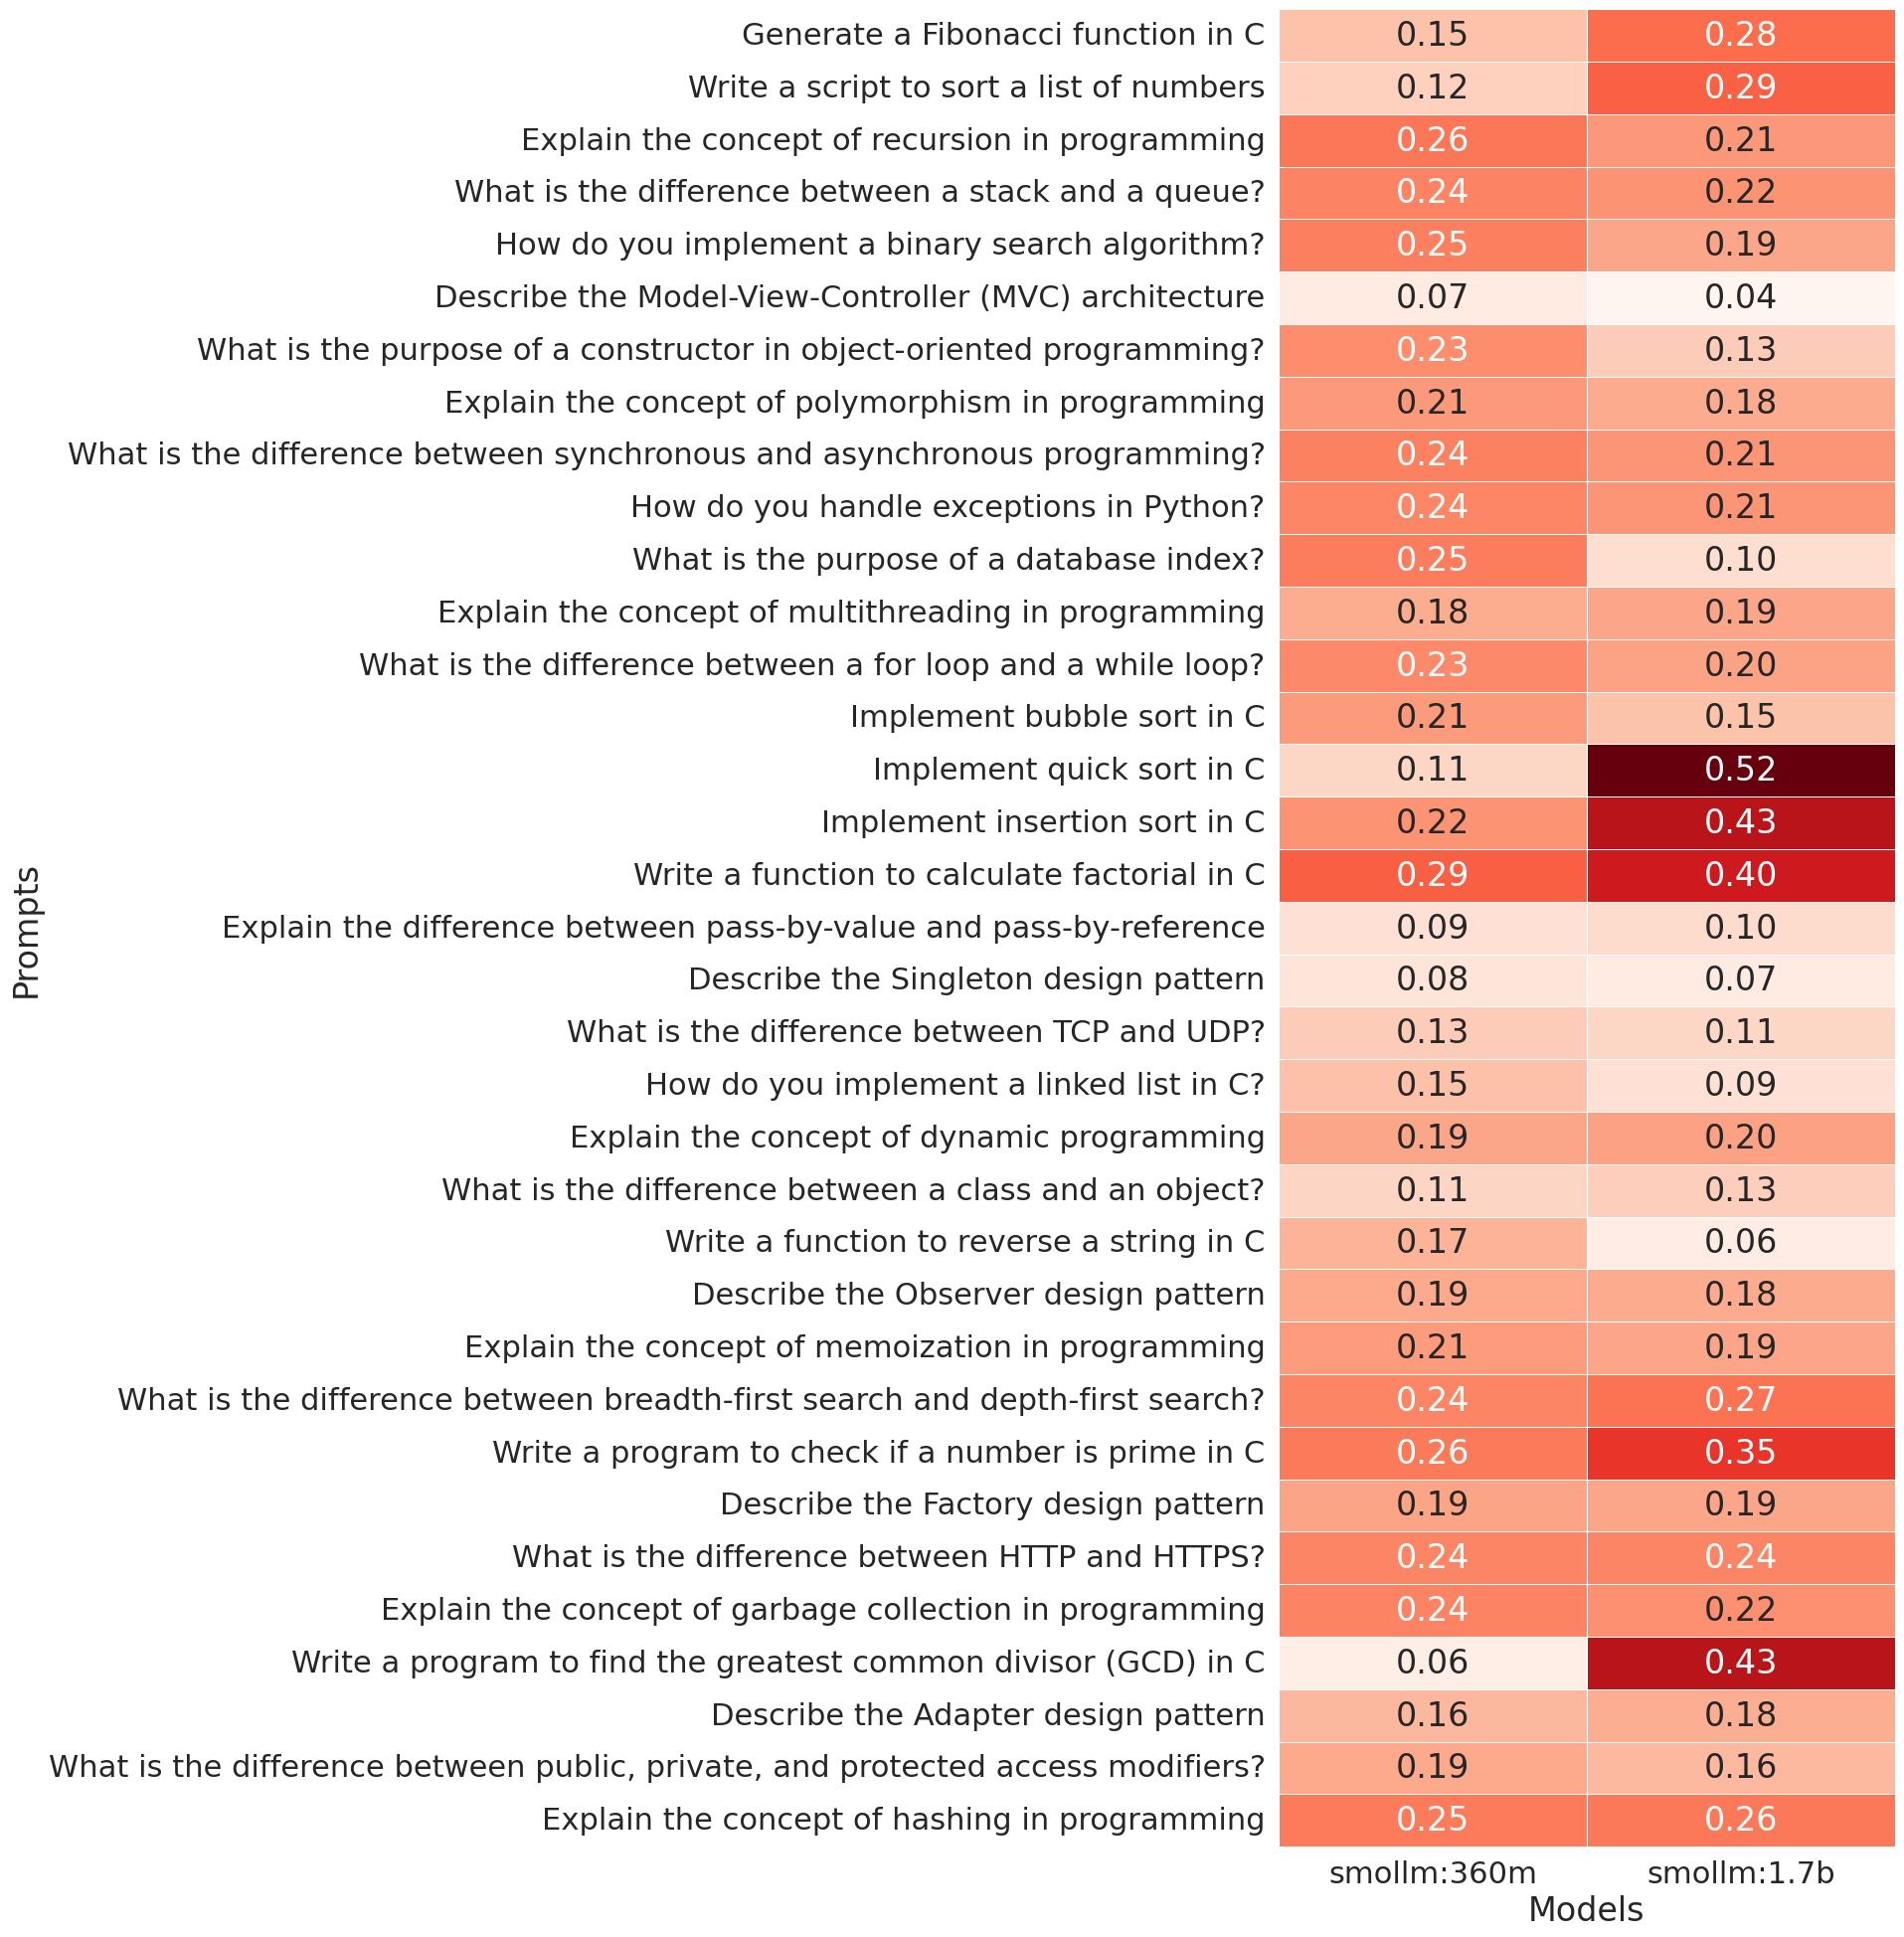

In [10]:
# visualize the ROUGE-L scores using a heatmap
plt.figure(figsize=(4 * scale, 12 * scale))
sns.set(font_scale=scale)
sns.heatmap(rouge_l_df.iloc[:, 1:], annot=True, cmap='Reds', fmt=".2f", linewidths=.5, cbar=False)
#plt.title('ROUGE-L Scores for Models and Prompts')
plt.xlabel('Models')
plt.ylabel('Prompts')
plt.show()